## This notebook shows how to load and use the provided models.

#### It shows how to calculate and plot:
*		Predictions
*		Deexplainer contribution scores
*		In silico saturation mutagenesis

#### 3 models are provided in ./models folder: DeepMEL, DeepMEL2, and DeepMEL2 with GABPA extension.
#### These models can be downloaded from Zenodo, which are used by Kipoi database:
*		DeepMEL: https://zenodo.org/records/3592129
*		DeepMEL2: https://zenodo.org/records/4590308
*		DeepMEL_GABPA: https://zenodo.org/records/4590405

#### General imports

In [1]:
import sys  
import os
import pickle
import utils
import numpy as np
import scipy
import tensorflow as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#### Loading DeepMEL2 data to be used for the initialization of shap.DeepExplainer

In [2]:
print('Loading data...')
f = open('./data/deepmel2/DeepMEL2_nonAugmented_data.pkl', "rb")
nonAugmented_data_dict = pickle.load(f)
f.close()

Loading data...


#### Loading the models and initializing shap.DeepExplainer

In [3]:
print('Loading model...')
import shap
tf.disable_eager_execution()
rn=np.random.choice(nonAugmented_data_dict["train_data"].shape[0], 250, replace=False)
model_dict = {}
exp_dict = {} 

name = "deepmel2"
model_json_file = "models/deepmel2/model.json"
model_hdf5_file = "models/deepmel2/model_epoch_07.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


name = "deepmel2_gabpa"
model_json_file = "models/deepmel2_gabpa/model.json"
model_hdf5_file = "models/deepmel2_gabpa/model_epoch_09.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


name = "deepmel"
model_json_file = "models/deepmel/model.json"
model_hdf5_file = "models/deepmel/model_best_loss.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


Loading model...


In [4]:
nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}

#### IRF4 enhancer and TERT promoter sequences

In [5]:
irf4_onehot = utils.one_hot_encode_along_row_axis("AGGGTCGGGCGTGTCCGCCTGTTGGAATATGCTTCTCAGGTCTTCTGGGAAACAGATGTTTTGTGGAAGTGGAAGATTTTGGAAGTAGTGCCTTATCATGTGAAACCACAGGGCAGCTGATCTCTTCAGGCTTTCTTGATGTGAATGACAGCTTTGTTTCATCCACTTTGGTGGGTAAAAGAAGGCAAATTCCCCTGTGGTACTTTTGGTGCCAGGTTTAGCCATATGACGAAGCTTTACATAAAACAGTACAAGTATCTCCATTGTCCTTTATGATCCTCCATGAGTGTTTTCACTTAGTCTGATGAAGGGTTCACTCCAGTCTTTTCGGATGATAAAATGCTTCGGCTGTCAGTCTAATAAGGGATTCCCTGAGGAGTTTGGAGGCTGTAAGAGCACCCCCCGTCTCAATGCCAGTGCTTCTTATCTCAGCCTCTCCTGCACTCCTTTACCCCCGTCTCGATGCCAGTGCTTCCTATCTCAGCCTCTCCTGCACTCCT")
tert_onehot = utils.one_hot_encode_along_row_axis("CGCCAGCCCTGGGGCCCCAGGCGCCGCACGAACGTGGCCAGCGGCAGCACCTCGCGGTAGTGGCTGCGCAGCAGGGAGCGCACGGCTCGGCAGCGGGGAGCGCGCGGCATCGCGGGGGTGGCCGGGGCCAGGGCTTCCCACGTGCGCAGCAGGACGCAGCGCTGCCTGAAACTCGCGCCGCGAGGAGAgggcggggccgcggaaaggaaggggaggggctgggagggcccggagggggctgggccggggacccgggaggggtcgggacggggcggggtccgcgcggaggaggcggagctggaaggtgaaggggcaggacgggTGCCCGGGTCCCCAGTCCCTCCGCCACGTGGGAAGCGCGGTCCTGGGCGTCTGTGCCCGCGAATCCACTGGGAGCCCGGCCTGGCCCCGACAGCGCAGCTGCTCCGGGCGGACCCGGGGGTCTGGGCCGCGCTTCCCCGCCCGCGCGCCGCTCGCGCTCCCAGGGTGCAGGGACGCCA")

#### Calculating and plotting nucleotide contribution scores and in silico saturation mutagenesis values 
#### using the DeepMEL2 model and IRF4 enhancer

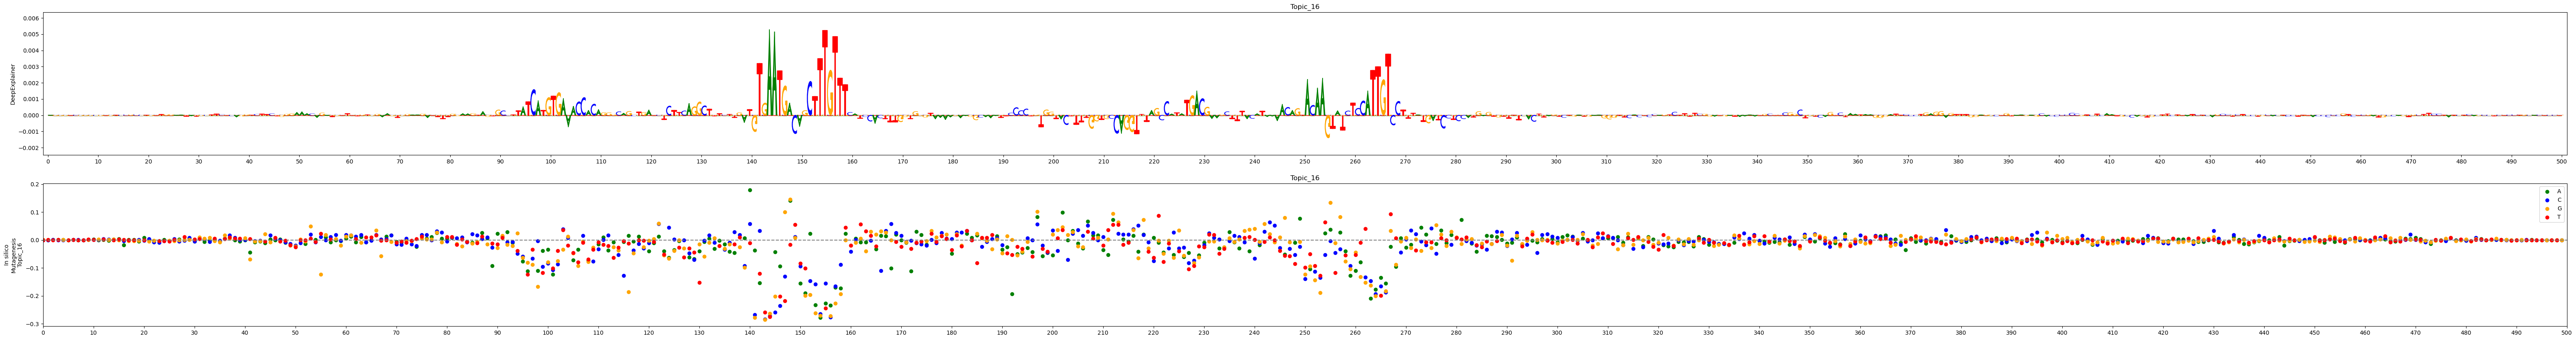

In [6]:
onehot_seq = np.copy(irf4_onehot)
ntrack = 2
fig = plt.figure(figsize=(80,ntrack*5))
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_seq, class_no = 16)
_ = utils.plot_mutagenesis_givenax_fast_withrc(model=model_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=onehot_seq, class_no = 16)
#plt.savefig("tmp/irf4.pdf")


#### Calculating and plotting nucleotide contribution scores and in silico saturation mutagenesis values 
#### using the DeepMEL2_GABPA model and TERT promoter

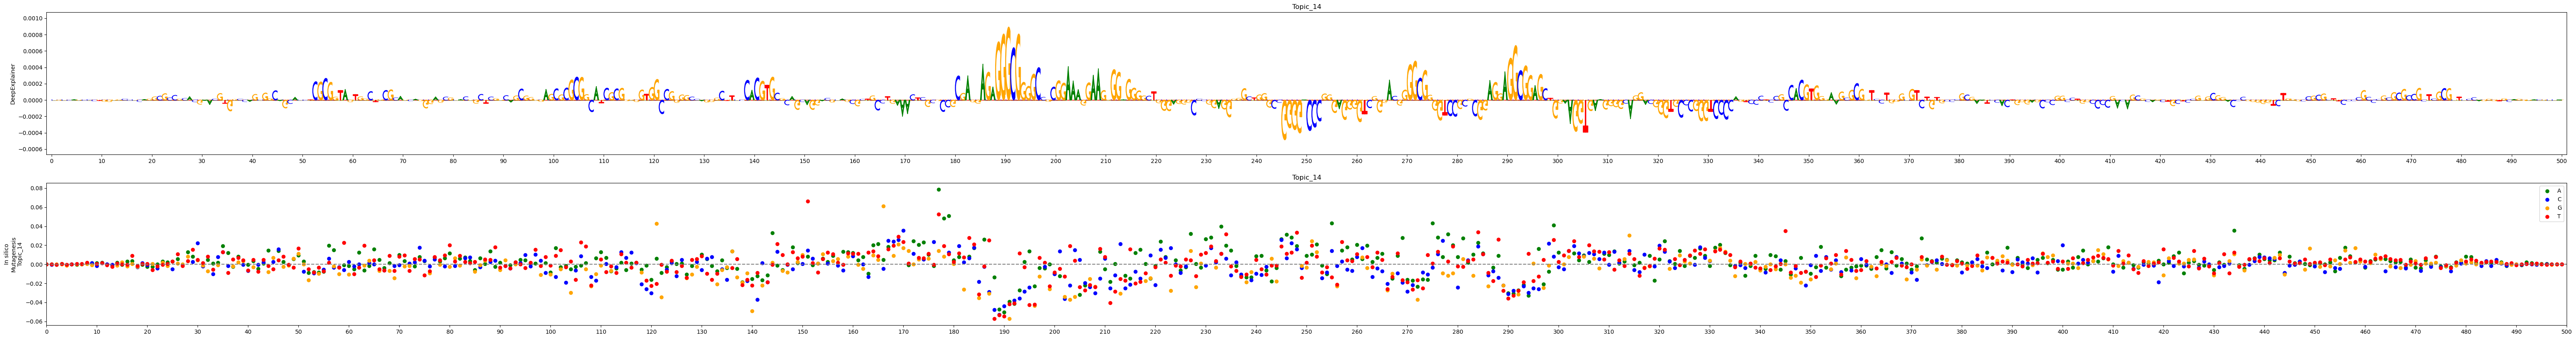

In [7]:
onehot_seq = np.copy(tert_onehot)
ntrack = 2
fig = plt.figure(figsize=(80,ntrack*5))
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2_gabpa"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_seq, class_no = 14)
_ = utils.plot_mutagenesis_givenax_fast_withrc(model=model_dict["deepmel2_gabpa"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=onehot_seq, class_no = 14)
#plt.savefig("tmp/tert.pdf")


#### Plotting prediction scores on IRF4 enhancer

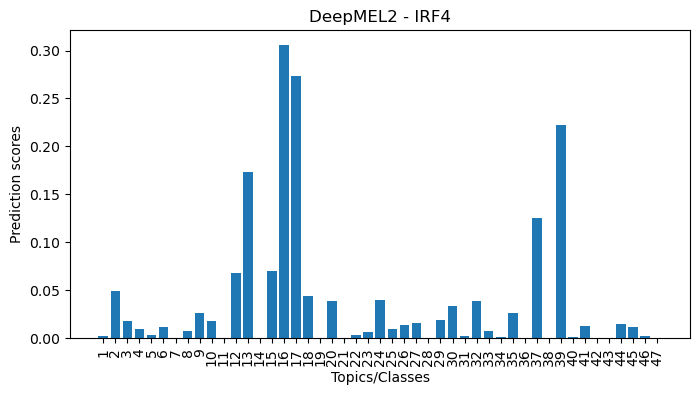

In [8]:
onehot_seq = np.copy(irf4_onehot)
prediction = model_dict["deepmel2"].predict([onehot_seq,onehot_seq[:,::-1,::-1]])

plt.figure(figsize=(8,4))
plt.bar(range(len(prediction[0])),prediction[0])
plt.title("DeepMEL2 - IRF4")
plt.xlabel("Topics/Classes")
plt.ylabel("Prediction scores")
_ = plt.xticks(range(len(prediction[0])),range(1,len(prediction[0])+1),rotation=90)